In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/jovyan/accesibilidad-urbana/aup/data.py:25: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


<Axes: >

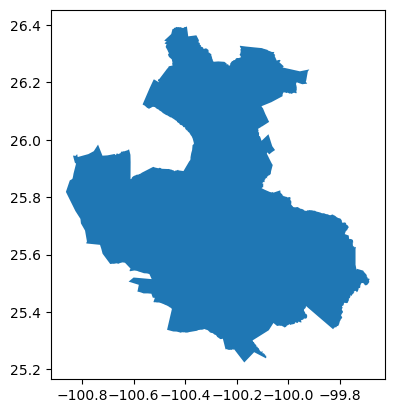

In [3]:
city = 'Monterrey'
res = 9

metro_schema = 'metropolis'
metro_table = 'metro_gdf_2020'

# --------------- CREATE AREA OF INTEREST (aoi)
# Downloads mun_gdf for city and create aoi
query = f"SELECT * FROM {metro_schema}.{metro_table} WHERE \"city\" LIKE \'{city}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')
mun_gdf = mun_gdf.set_crs("EPSG:4326")
aoi = mun_gdf.dissolve()

poly_wkt = aoi.dissolve().geometry.to_wkt()[0]

#Show
aoi.plot()

In [10]:
hexgrid = aup.create_hexgrid(aoi,res)
#  2 segundos

<Axes: >

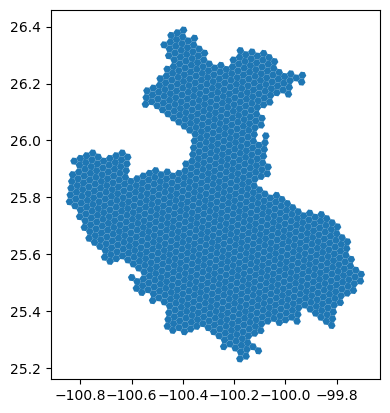

In [9]:
hexgrid.plot()

In [11]:
hex_schema = 'hexgrid'
hex_table = 'hexgrid_9_city_2020'

# --------------- CREATE HEXGRID
query = f"SELECT * FROM {hex_schema}.{hex_table} WHERE \"city\" LIKE \'{city}\'"
hex_gdf = aup.gdf_from_query(query, geometry_col='geometry')
hex_gdf = hex_gdf.set_crs("EPSG:4326")

# 4 segundos

In [13]:
hexgrid

,hex_id_9,geometry
0,8948a228357ffff,"POLYGON ((-100.31445 26.07615, -100.31315 26.0..."
1,8948a272cdbffff,"POLYGON ((-100.09174 25.81476, -100.09045 25.8..."
2,8948a2334b3ffff,"POLYGON ((-100.48866 25.74048, -100.48737 25.7..."
3,8948a28c687ffff,"POLYGON ((-100.39485 25.36754, -100.39356 25.3..."
4,8948a2cd327ffff,"POLYGON ((-99.85982 25.45752, -99.85852 25.459..."
...,...,...
60115,8948a2102a7ffff,"POLYGON ((-100.22858 25.46500, -100.22729 25.4..."
60116,8948a251dd3ffff,"POLYGON ((-99.74342 25.52200, -99.74213 25.523..."
60117,8948849424fffff,"POLYGON ((-100.41674 26.33300, -100.41544 26.3..."
60118,8948a2a9567ffff,"POLYGON ((-100.48902 25.65966, -100.48772 25.6..."


In [12]:
hex_gdf

,hex_id_9,geometry,CVEGEO,NOMGEO,city,type
0,8948a20c1dbffff,"POLYGON ((-100.20964 25.79144, -100.20834 25.7...",19006,Apodaca,Monterrey,urban
1,8948a20c9a3ffff,"POLYGON ((-100.26745 25.85271, -100.26615 25.8...",19006,Apodaca,Monterrey,rural
2,8948a20c59bffff,"POLYGON ((-100.22262 25.76705, -100.22133 25.7...",19006,Apodaca,Monterrey,rural
3,8948a20f2a7ffff,"POLYGON ((-100.14669 25.74508, -100.14540 25.7...",19006,Apodaca,Monterrey,urban
4,8948a20f0cfffff,"POLYGON ((-100.15190 25.73016, -100.15060 25.7...",19006,Apodaca,Monterrey,urban
...,...,...,...,...,...,...
60115,8948a21a42bffff,"POLYGON ((-100.10634 25.44836, -100.10505 25.4...",19049,Santiago,Monterrey,rural
60116,8948a2c6803ffff,"POLYGON ((-100.16160 25.34943, -100.16031 25.3...",19049,Santiago,Monterrey,rural
60117,8948a2c59d7ffff,"POLYGON ((-100.08102 25.41638, -100.07973 25.4...",19049,Santiago,Monterrey,rural
60118,8948a21369bffff,"POLYGON ((-100.18092 25.37731, -100.17962 25.3...",19049,Santiago,Monterrey,rural
